1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.
3. [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [38]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 3, n_targets = 1, 
                                              noise = 10, coef = True, random_state = 27)

In [40]:
X, y

(array([[ 0.52225458,  0.73227901,  1.76053791],
        [ 1.72420835, -2.71132437, -0.02487641],
        [-0.76508594,  0.44958027, -1.175286  ],
        ...,
        [ 0.15150723, -0.43280087, -1.10544171],
        [ 0.6356684 , -0.63383414,  0.4532737 ],
        [-0.32070134,  0.2403019 , -0.1330117 ]]),
 array([ 2.16154385e+02,  1.11625989e+02, -1.87270591e+02,  5.84695488e+01,
        -5.88620083e+01, -1.92040439e+02,  5.51077228e+01, -9.08976686e+01,
         2.59698419e+02, -4.89123808e+01,  1.35212273e+02,  4.25289012e+01,
         3.83394611e+01, -1.28649795e+02, -3.49844430e+01, -1.77887886e+02,
        -6.01283025e+01, -9.85818424e+01,  4.73458228e+01,  5.30990497e+01,
         1.46264987e+01, -1.68801530e+02, -6.67311931e+01,  1.71508804e+02,
         1.01847870e+02,  1.72103241e+02, -3.26395768e+02, -5.12053726e+01,
        -3.30421957e+01, -3.84559906e+01, -7.62375272e+00,  6.88488855e+01,
         3.96127670e+01, -4.68210132e+01, -1.07603186e+02, -8.66871662e+01,
       

Градиентный спуск

In [41]:
def calculate_mse(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значение метрики MSE (Mean-Squared-Error).

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    score: float
        Значение метрики качества.

    """
    assert len(y_true) == len(y_pred)
    score = np.mean(np.square(y_true - y_pred))

    return score

def fit_linear_model(X: np.array,
                     y: np.array,
                     batch_size: int = 32,
                     learning_rate: float = 0.01,
                     n_iters: int = 1000,
                     tol: float = 1e-5):
    """
    Обучение линейной регрессии алгоритмом градиентного спуска.

    Parameters
    ----------
    X: np.array
        Матрица признаков для обучения.

    y: np.array
        Вектор целевой переменной для обучения.

    learning_rate: float, optional, default = 0.01
        Скорость обучения. Опциональный параметр, по
        умолчанию, равен 0.01.

    n_iters: int, optional, default = 1000
        Количество итераций обучения. Опциональный параметр,
        по умолчанию, равен 1000.

    tol: float, optional, default = 1e-5
        Минимальное значимое изменение ошибки, при котором
        обучение продолжается. Если изменение ошибки на соседних
        итерациях меньше указанной величины, то обучение прекращается.

    Returns
    -------
    weights: np.array
        Вектор весов линейной модели.

    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    """
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [], [weights]
    n_batches = len(y) // batch_size
    if len(y) % batch_size:
        n_batches =+1

    for n_iter in range(n_iters):
        for batch_number in range(n_batches):
            x_batch = X[batch_number*batch_size:(batch_number+1)*batch_size]
            y_batch = y[batch_number*batch_size:(batch_number+1)*batch_size]
            
            y_pred = np.dot(weights, x_batch.T)
            current_error = calculate_mse(y_batch, y_pred)
            weights -= 2*learning_rate*np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred)
            # weights = weights - 2*learning_rate*np.dot(X, (y_pred-y))/len(y_pred)
            errors_history.append(current_error)
            weights_history.append(weights)

            if n_iter > 2 and np.abs(current_error - errors_history[-2]) < tol:
                break
        
    return weights, weights_history, errors_history

In [42]:
np.random.seed(27)
gd_weights, gd_weights_history, gd_errors_history = fit_linear_model(
        X, y, batch_size=X.shape[0])

In [43]:
np.random.seed(27)
gds_weights, gds_weights_history, gds_errors_history = fit_linear_model(
        X, y, batch_size=1)

(0, 400)

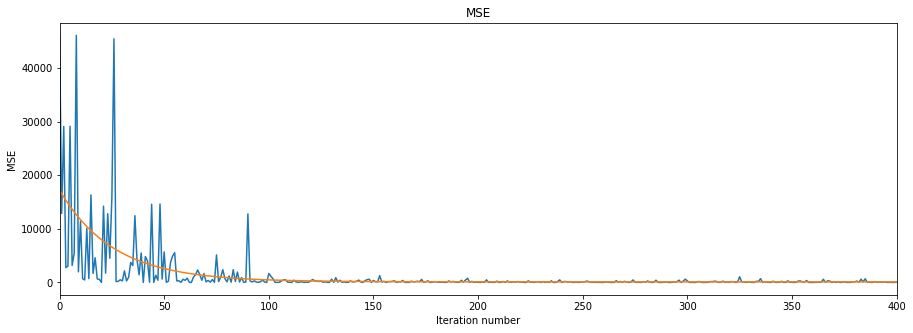

In [45]:
# Визуализируем изменение функционала ошибки
fig = plt.figure(figsize=(15, 5))
plt.title('Linear regression', size=15)
plt.plot(gds_errors_history, label='Stohastik Gradient Descent')
plt.plot(gd_errors_history, label='Gradient Descent')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 400)

Добавим 𝐿2 -регуляризацию для Градиентного спуска

In [47]:
def fit_ridge_model(X: np.array,
                     y: np.array,
                     batch_size: int = 32,
                     lambda_: float = 0.0001,
                     learning_rate: float = 0.01,
                     n_iters: int = 1000,
                     tol: float = 1e-5):
    """
    Обучение линейной регрессии алгоритмом градиентного спуска.

    Parameters
    ----------
    X: np.array
        Матрица признаков для обучения.

    y: np.array
        Вектор целевой переменной для обучения.

    learning_rate: float, optional, default = 0.01
        Скорость обучения. Опциональный параметр, по
        умолчанию, равен 0.01.

    n_iters: int, optional, default = 1000
        Количество итераций обучения. Опциональный параметр,
        по умолчанию, равен 1000.

    tol: float, optional, default = 1e-5
        Минимальное значимое изменение ошибки, при котором
        обучение продолжается. Если изменение ошибки на соседних
        итерациях меньше указанной величины, то обучение прекращается.

    Returns
    -------
    weights: np.array
        Вектор весов линейной модели.

    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    """
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [], [weights]
    n_batches = len(y) // batch_size
    if len(y) % batch_size:
        n_batches =+1

    for n_iter in range(n_iters):
        for batch_number in range(n_batches):
            x_batch = X[batch_number*batch_size:(batch_number+1)*batch_size]
            y_batch = y[batch_number*batch_size:(batch_number+1)*batch_size]
            
            y_pred = np.dot(weights, x_batch.T)
            current_error = calculate_mse(y_batch, y_pred)
            weights -= 2*learning_rate*np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred)+ 2*lambda_ * weights
            # weights = weights - 2*learning_rate*np.dot(X, (y_pred-y))/len(y_pred)
            errors_history.append(current_error)
            weights_history.append(weights)

            if n_iter > 2 and np.abs(current_error - errors_history[-2]) < tol:
                break
        
    return weights, weights_history, errors_history

In [48]:
np.random.seed(27)
gd_weights, gd_weights_history, gd_errors_history = fit_ridge_model(
        X, y, batch_size=X.shape[0])

In [49]:
np.random.seed(27)
gd_weights, gd_weights_history, gd_errors_history = fit_ridge_model(
        X, y, batch_size=1)

(0, 400)

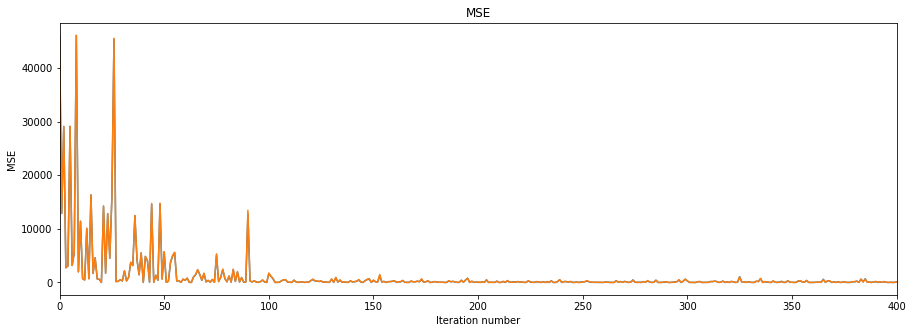

In [50]:
# Визуализируем изменение функционала ошибки
fig = plt.figure(figsize=(15, 5))
plt.title('Ridge regression', size=15)
plt.plot(gds_errors_history, label='Stohastik Gradient Descent')
plt.plot(gd_errors_history, label='Gradient Descent')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 400)